In [1]:
import pandas as pd
import numpy as np
import geatpy as ea

In [2]:
场地处理能力df = pd.read_excel('../../preprocess/场地处理能力.xlsx')
线路运输能力df = pd.read_excel('../../preprocess/线路运输能力.xlsx')
rawData = pd.read_excel('../../preprocess/左侧填充-物流网络历史货量数据.xlsx')


In [3]:
# 与DC5相关的线路
向dc5发货的场地 = rawData[(rawData['场地2'] == 'DC5')]['场地1']
print(向dc5发货的场地)
print(f'发送货物到DC5的路线数量：{len(向dc5发货的场地)}')
可用的分发线路 = rawData[rawData['场地1'].isin(向dc5发货的场地)]
可用的分发线路

24      DC10
44      DC11
55      DC12
63      DC13
89      DC14
        ... 
978     DC73
988     DC74
996     DC76
1016     DC8
1042     DC9
Name: 场地1, Length: 67, dtype: object
发送货物到DC5的路线数量：67


,场地1,场地2,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
1,DC10,DC12,306,328,163,193,565,964,623,284,...,73,73,73,73,73,73,73,73,73,73
2,DC10,DC13,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
3,DC10,DC14,2613,2941,5968,4459,7646,5106,7155,5939,...,8663,9818,12248,13255,9896,15492,8230,29021,9991,13254
4,DC10,DC17,5,5,5,5,5,5,5,5,...,2,2,2,2,2,2,2,2,2,2
5,DC10,DC19,10,10,10,10,10,10,10,10,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,DC9,DC58,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1045,DC9,DC62,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1046,DC9,DC67,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
1047,DC9,DC79,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [7]:
# 定义问题类
class MyProblem(ea.Problem):
    def __init__(self):
        name = 'MyProblem'
        M = 1  # 目标维数
        maxormins = [-1] * M  # 最小化目标

        Dim = 2  # 决策变量维数
        varTypes = [0, 0]  # 决策变量类型（0为实数，1为整数）
        lb = [-5, -5]  # 决策变量下界
        ub = [5, 5]  # 决策变量上界
        lbin = [1, 1]  # 决策变量是否包含下界
        ubin = [1, 1]  # 决策变量是否包含上界
        self.consTypes = []  # 约束类型
        self.consDims = []  # 约束维数
        self.cons = []  # 约束函数

        # 调用父类构造方法
        super().__init__(name, M, maxormins, Dim, varTypes, lb, ub, lbin, ubin)

    # 定义evalVar方法计算目标函数值
    def evalVars(self, vars):
        x = vars  # 决策变量矩阵
        y = x[:, 0] ** 2 + x[:, 1] ** 2  # 目标函数
        return y.reshape(-1, 1)  # 返回目标函数值矩阵


gen |  eval  |    f_opt    |    f_max    |    f_avg    |    f_min    |    f_std    
-----------------------------------------------------------------------------------
 0  |  100   | 4.20667E+01 | 4.20667E+01 | 1.63065E+01 | 5.64348E-02 | 1.05879E+01 
 1  |  200   | 4.20667E+01 | 4.15864E+01 | 1.92124E+01 | 5.64348E-02 | 1.02326E+01 
 2  |  300   | 4.57846E+01 | 4.57846E+01 | 2.35506E+01 | 1.12072E-01 | 9.83436E+00 
 3  |  400   | 4.57846E+01 | 4.38160E+01 | 2.74351E+01 | 3.07188E+00 | 9.43450E+00 
 4  |  500   | 4.57846E+01 | 4.44524E+01 | 2.83332E+01 | 4.28460E+00 | 1.00455E+01 
 5  |  600   | 4.76125E+01 | 4.76125E+01 | 3.05650E+01 | 8.97233E+00 | 9.38560E+00 
 6  |  700   | 4.76125E+01 | 4.72364E+01 | 3.10061E+01 | 5.44837E-01 | 9.68108E+00 
 7  |  800   | 4.76125E+01 | 4.74321E+01 | 3.03817E+01 | 1.81446E+00 | 1.07158E+01 
 8  |  900   | 4.76125E+01 | 4.75867E+01 | 3.24381E+01 | 4.23641E+00 | 1.03060E+01 
 9  |  1000  | 4.76125E+01 | 4.73747E+01 | 3.37092E+01 | 3.60892E+00 | 9.598

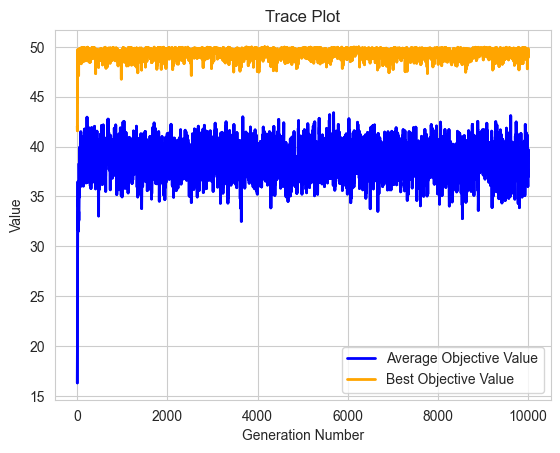

Execution time: 1.8939597606658936 s
Evaluation number: 999900
The best objective value is: 49.99771119328247
The best variables are: 
-4.9999237054726064	4.999847410945213	


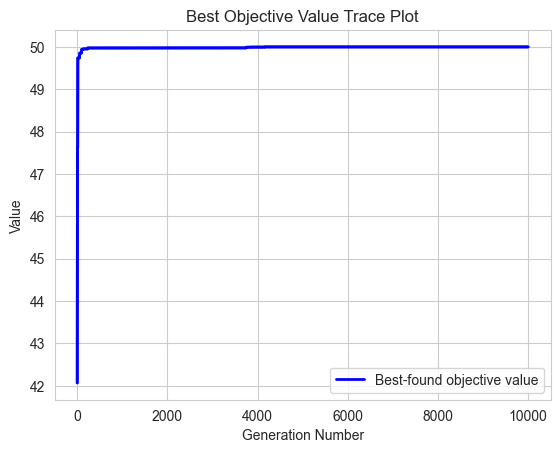

AttributeError: 'soea_SGA_templet' object has no attribute 'best_individ'

In [8]:


# 实例化问题对象
problem = MyProblem()
# 构建算法
algorithm = ea.soea_SGA_templet(
    problem,
    ea.Population(Encoding='BG',  # 种群的染色体是'BG'编码
                  NIND=100),  # 种群数量
    MAXGEN=9999,  # 最大进化代数
    logTras=1,
    trappedValue=1e-6,  # 单目标优化陷入停滞的判断阈值。
    maxTrappedCount=1000  # 进化停滞计数器最大上限值。
)  # 表示每隔多少代记录一次日志信息，0表示不记录。
# algorithm.mutOper.Pm = 0.2  # 修改变异算子的变异概率
# algorithm.recOper.XOVR = 0.7  # 修改交叉算子的交叉概率

# 求解
res = ea.optimize(algorithm,
                  seed=1,
                  # prophet=prophet,
                  verbose=True,
                  drawing=1,
                  outputMsg=True,
                  drawLog=True,
                  saveFlag=True,
                  dirName='result_blue',
                  )
